In [700]:
from datasets import load_dataset
from seqeval.metrics import classification_report
import pycrfsuite
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns


# Stats

In [699]:
dataset = load_dataset('conll2003')
train = dataset['train']
validation = dataset['validation']
test = dataset['test']

def prepare_data(data):
    sentences = []
    for item in data:
        words = item['tokens']
        labels = item['ner_tags']
        pos_tags = item['pos_tags']
        chunk_tags = item['chunk_tags']
        sentences.append((words, labels, pos_tags,chunk_tags))
    return sentences
def get_key_from_value(my_dict, value):
    for k, v in my_dict.items():
        if v == value:
            return k
    return None
label_encoding = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}
train_sentences = prepare_data(train)
test_sentences = prepare_data(test)
validation_sentences = prepare_data(validation)

Found cached dataset conll2003 (C:/Users/FAYSA/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#calculate bar chart of labels in y_train_flat without O and for y_val_flat and for y_test_flat



Y = []
for sentence,labels,pos_tag,chunk_tag  in train_sentences:
    # check that there are labels for the sentence
    if labels:
        y = [get_key_from_value(label_encoding, label) for label in labels]
        Y.append(y)
y_train_flat = [item for sublist in Y for item in sublist]


Y_val = []
for sentence,labels,pos_tag,chunk_tag  in validation_sentences:
    # check that there are labels for the sentence

    if labels:
        y = [get_key_from_value(label_encoding, label) for label in labels]
        Y_val.append(y)
y_val_flat = [item for sublist in Y_val for item in sublist]



Y_test = []
for sentence,labels,pos_tag,chunk_tag  in test_sentences:
    # check that there are labels for the sentence

    if labels:
        y = [get_key_from_value(label_encoding, label) for label in labels]
        Y_test.append(y)
y_test_flat = [item for sublist in Y_test for item in sublist]


#calculate bar chart of labels in y_train_flat without O
y_train_flat_no_O = [label for label in y_train_flat if label != 'O']
y_train_flat_no_O

#calculate bar chart of labels in y_val_flat without O
y_val_flat_no_O = [label for label in y_val_flat if label != 'O']
y_val_flat_no_O

#calculate bar chart of labels in y_test_flat without O
y_test_flat_no_O = [label for label in y_test_flat if label != 'O']
y_test_flat_no_O

#plot 3 subplots bar charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,10))
fig.suptitle('Number of labels in y_train, y_val and y_test without O')
ax1.bar(Counter(y_train_flat_no_O).keys(),Counter(y_train_flat_no_O).values())
ax1.set_title('y_train')
ax2.bar(Counter(y_val_flat_no_O).keys(),Counter(y_val_flat_no_O).values())
ax2.set_title('y_val')
ax3.bar(Counter(y_test_flat_no_O).keys(),Counter(y_test_flat_no_O).values())
ax3.set_title('y_test')
plt.show()



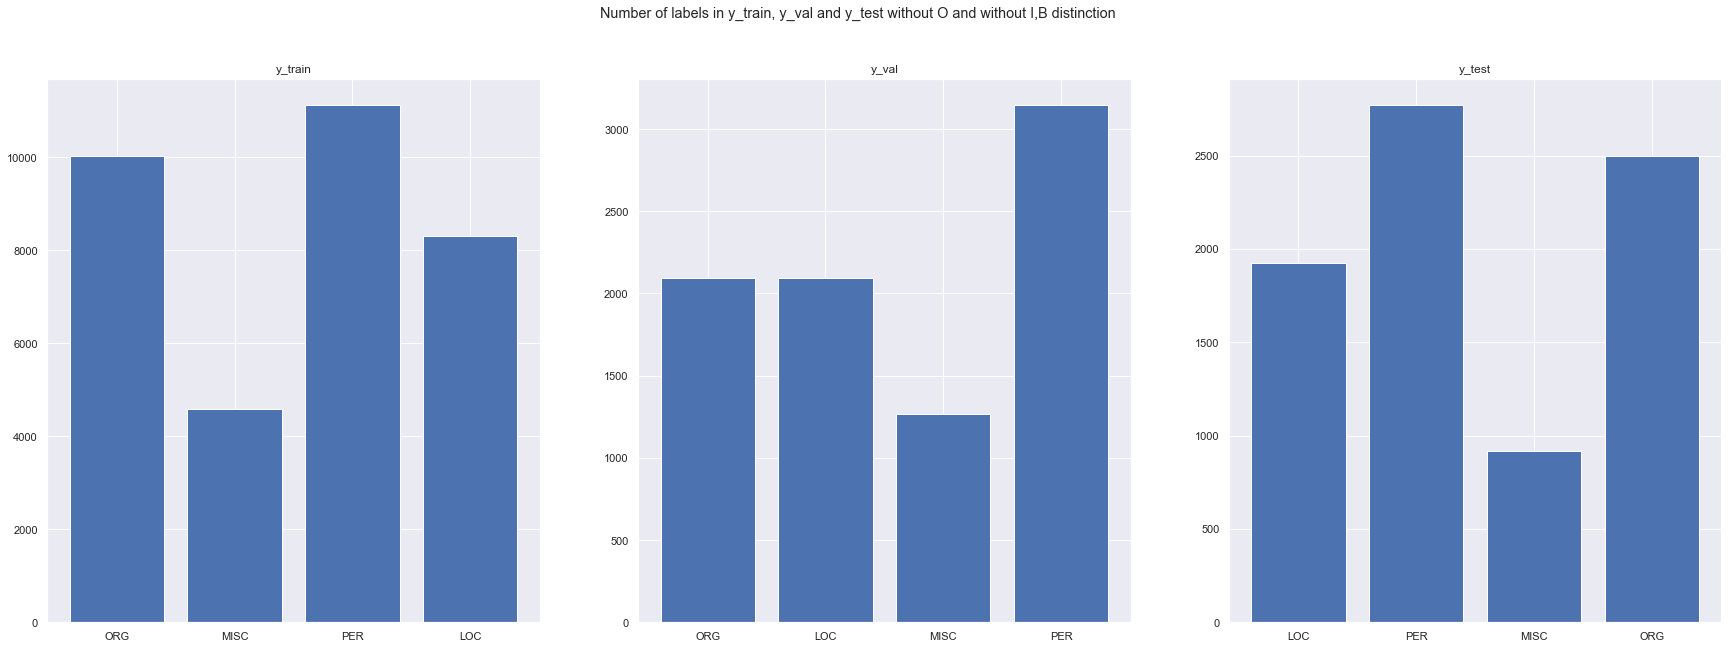

In [ ]:
#combine B and I labels for no I,B distinction
y_train_flat_no_O_no_I_B = [label[2:] if label.startswith('I-') or label.startswith('B-') else label for label in y_train_flat_no_O]

y_val_flat_no_O_no_I_B = [label[2:] if label.startswith('I-') or label.startswith('B-') else label for label in y_val_flat_no_O]

y_test_flat_no_O_no_I_B = [label[2:] if label.startswith('I-') or label.startswith('B-') else label for label in y_test_flat_no_O]

#plot 3 subplots bar charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,10))
fig.suptitle('Number of labels in y_train, y_val and y_test without O and without I,B distinction')
ax1.bar(Counter(y_train_flat_no_O_no_I_B).keys(),Counter(y_train_flat_no_O_no_I_B).values())
ax1.set_title('y_train')
ax2.bar(Counter(y_val_flat_no_O_no_I_B).keys(),Counter(y_val_flat_no_O_no_I_B).values())
ax2.set_title('y_val')
ax3.bar(Counter(y_test_flat_no_O_no_I_B).keys(),Counter(y_test_flat_no_O_no_I_B).values())
ax3.set_title('y_test')
plt.show()



### get dataframes of words and their features in all datasets

In [ ]:

X = []
for sentence,labels,pos_tag,chunk_tag  in train_sentences:
    # check that there are labels for the sentence

    if labels:
        x = [word_features(sentence,pos_tag,chunk_tag, i) for i in range(len(sentence))]
        X.append(x)

X_df = pd.DataFrame(X[0],columns=X[0][0].keys())


for i in tqdm(range(1,len(X))):
    X_df = X_df.append(pd.DataFrame(X[i],columns=X[i][0].keys()),ignore_index=True)


#convert X to dataframe whose columns are keys of the dictionary
X_df = pd.DataFrame(X[0],columns=X[0][0].keys())
X_df



X_val = []
for sentence,labels,pos_tag,chunk_tag  in validation_sentences:
    # check that there are labels for the sentence
    if labels:
        x = [word_features(sentence,pos_tag,chunk_tag, i) for i in range(len(sentence))]
        X_val.append(x)

X_val_df = pd.DataFrame(X_val[0],columns=X_val[0][0].keys())

for i in tqdm(range(1,len(X_val))):
    X_val_df = X_val_df.append(pd.DataFrame(X_val[i],columns=X_val[i][0].keys()),ignore_index=True)
X_val_df

X_val_df.to_csv('X_val_df.csv',index=False)

X_test = []
for sentence,labels,pos_tag,chunk_tag  in test_sentences:
    # check that there are labels for the sentence
    if labels:
        x = [word_features(sentence,pos_tag,chunk_tag, i) for i in range(len(sentence))]
        X_test.append(x)

X_test_df = pd.DataFrame(X_test[0],columns=X_test[0][0].keys())

for i in tqdm(range(1,len(X_test))):
    X_test_df = X_test_df.append(pd.DataFrame(X_test[i],columns=X_test[i][0].keys()),ignore_index=True)

X_test_df.to_csv('X_test_df.csv',index=False)
X_test_df

## stats for all datasets for word count and nunmber of sentences

In [ ]:
#organize in dataframe that contains number of unique words in all dfs and number of sentences train_sentences and _val and _test
import pandas as pd
freq_df = pd.DataFrame(columns=['train_sentences','val_sentences','test_sentences','unique_words_train','unique_words_val','unique_words_test'])
freq_df['train_sentences'] = [len(train_sentences)]
freq_df['val_sentences'] = [len(validation_sentences)]
freq_df['test_sentences'] = [len(test_sentences)]
freq_df['unique_words_train'] = [len(X_df["word"].value_counts())]
freq_df['unique_words_val'] = [len(X_val_df["word"].value_counts())]
freq_df['unique_words_test'] = [len(X_test_df["word"].value_counts())]
freq_df


train_sentences  val_sentences  test_sentences  unique_words_train  \
0            14041           3250            3453               23623   

   unique_words_val  unique_words_test  
0              9966               9488

# Baseline

In [701]:
dataset = load_dataset('conll2003')
train = dataset['train']
validation = dataset['validation']
test = dataset['test']

Found cached dataset conll2003 (C:/Users/FAYSA/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98)


  0%|          | 0/3 [00:00<?, ?it/s]

In [735]:
def prepare_data(data):
    sentences = []
    for item in data:
        words = item['tokens']
        labels = item['ner_tags']
        sentences.append((words, labels))
    return sentences

In [736]:
train_sentences = prepare_data(train)
test_sentences = prepare_data(test)
validation_sentences = prepare_data(validation)

In [737]:
#divide train_sentences into X_train and y_train
X_train = []
y_train = []
for sentence in train_sentences:
    X_train.append(sentence[0])
    y_train.append(sentence[1])

#divide test_sentences into X_test and y_test
X_test = []
y_test = []
for sentence in test_sentences:
    X_test.append(sentence[0])
    y_test.append(sentence[1])

#divide validation_sentences into X_val and y_val
X_val = []
y_val = []
for sentence in validation_sentences:
    X_val.append(sentence[0])
    y_val.append(sentence[1])
    

In [738]:
label_encoding = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}

In [739]:
def get_key_from_value(my_dict, value):
    for k, v in my_dict.items():
        if v == value:
            return k
    return None

#function to decode labels
def decode_labels(y):
    y_decoded = []
    for sent in y:
        y_decoded.append([get_key_from_value(label_encoding, label) for label in sent])
    return y_decoded

# feature functions for baseline model
def word_features(sent, i):
    features = {
        'word': sent[i]
    }
    return features

In [752]:
trainer = pycrfsuite.Trainer(verbose=False)

for sent, labels in train_sentences:
    # check that there are labels for the sentence
    if labels:
        x = [word_features(sent, i) for i in range(len(sent))]
        y = [get_key_from_value(label_encoding, label) for label in labels]
        trainer.append(x, y)


trainer.set_params({
    'c1': 0.1,
    'c2': 0.01,
    'max_iterations': 100,
    'feature.possible_transitions': True
})

trainer.train('conll2003.crfsuite')

In [753]:
tagger = pycrfsuite.Tagger()
tagger.open('conll2003.crfsuite')

def predict(sentence):
    x = [word_features(sentence, i) for i in range(len(sentence))]
    y = tagger.tag(x)
   # print(y)
   # print(list(label_encoding))
    return [list(label_encoding.keys())[list(label_encoding).index(label)] for label in y]

    

In [757]:
#calculate metrics for validation set
y_val_decoded= decode_labels(y_val)
y_pred_val = [predict(sentence) for sentence in X_val]
print(classification_report(y_val_decoded, y_pred_val, digits=2))



              precision    recall  f1-score   support

         LOC       0.87      0.78      0.82      1837
        MISC       0.93      0.80      0.86       922
         ORG       0.80      0.67      0.73      1341
         PER       0.86      0.62      0.72      1842

   micro avg       0.86      0.71      0.78      5942
   macro avg       0.87      0.72      0.78      5942
weighted avg       0.86      0.71      0.78      5942



In [758]:
#calculate metrics for test set
y_test_decoded= decode_labels(y_test)
y_pred_test = [predict(sentence) for sentence in X_test]
print(classification_report(y_test_decoded, y_pred_test, digits=2))

              precision    recall  f1-score   support

         LOC       0.73      0.66      0.69      1668
        MISC       0.77      0.68      0.72       702
         ORG       0.76      0.54      0.63      1661
         PER       0.70      0.43      0.53      1617

   micro avg       0.74      0.56      0.64      5648
   macro avg       0.74      0.58      0.65      5648
weighted avg       0.73      0.56      0.63      5648



# Improvement

In [514]:
dataset = load_dataset('conll2003')
train = dataset['train']
validation = dataset['validation']
test = dataset['test']

Found cached dataset conll2003 (C:/Users/FAYSA/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98)


  0%|          | 0/3 [00:00<?, ?it/s]

In [763]:
train

Dataset({
    features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
    num_rows: 14041
})

In [526]:
def prepare_data(data):
    sentences = []
    for item in data:
        words = item['tokens']
        labels = item['ner_tags']
        pos_tags = item['pos_tags']
        chunk_tags = item['chunk_tags']
        sentences.append((words, labels, pos_tags,chunk_tags))
    return sentences


train_sentences = prepare_data(train)
test_sentences = prepare_data(test)
validation_sentences = prepare_data(validation)

    
label_encoding = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}
def get_key_from_value(my_dict, value):
    for k, v in my_dict.items():
        if v == value:
            return k
    return None

#function to decode labels
def decode_labels(y):
    y_decoded = []
    for sent in y:
        y_decoded.append([get_key_from_value(label_encoding, label) for label in sent])
    return y_decoded






In [516]:
POS_label_encoding = {'O': 0, 'B-ADJP': 1, 'I-ADJP': 2, 'B-ADVP': 3, 'I-ADVP': 4, 'B-CONJP': 5, 'I-CONJP': 6, 'B-INTJ': 7, 'I-INTJ': 8,'B-LST': 9, 'I-LST': 10, 'B-NP': 11, 'I-NP': 12, 'B-PP': 13, 'I-PP': 14, 'B-PRT': 15, 'I-PRT': 16, 'B-SBAR': 17,'I-SBAR': 18, 'B-UCP': 19, 'I-UCP': 20, 'B-VP': 21, 'I-VP': 22}

### adding more features to extract more information from the text

In [571]:
def word_features(sent,pos_tag,chunk_tag, i):

    features = {
        'word': sent[i],
        'pos_tag': pos_tag[i],
        'chunk_tag': chunk_tag[i],
        'is_first': i == 0,
        'is_last': i == len(sent) - 1,
        'is_capitalized': sent[i][0].upper() == sent[i][0],
        'is_all_caps': sent[i].upper() == sent[i],
        'is_all_lower': sent[i].lower() == sent[i],
        'is_numeric': sent[i].isnumeric(),
        #'prefix_1': sent[i][0],
        'prefix_2': sent[i][:2],
        'prefix_3': sent[i][:3],
        'prefix_4': sent[i][:4],
        #'suffix_1': sent[i][-1],
        'suffix_2': sent[i][-2:],
        'suffix_3': sent[i][-3:],
        'suffix_4': sent[i][-4:],
        'prev_word': '' if i == 0 else sent[i-1],
        'next_word': '' if i == len(sent) - 1 else sent[i+1],
    }
    return features


In [572]:
#decode pos tags one by one
def decode_pos_tags(y):
    y_decoded = []
    for sent in y:
        y_decoded.append([get_key_from_value(POS_label_encoding, label) for label in sent])
    return y_decoded


In [581]:
trainer = pycrfsuite.Trainer(verbose=False)


for sentence,labels,pos_tag,chunk_tag  in train_sentences:
    # check that there are labels for the sentence

    if labels:
        x = [word_features(sentence,pos_tag,chunk_tag, i) for i in range(len(sentence))]
        y = [get_key_from_value(label_encoding, label) for label in labels]
        trainer.append(x, y)




trainer.set_params({
    'c1': 0.1,
    'c2': 0.01,
    'max_iterations': 100,
    'feature.possible_transitions': True
    
})

trainer.train('conll2003_improved.crfsuite')
tagger = pycrfsuite.Tagger()
tagger.open('conll2003_improved.crfsuite')



In [582]:
def predict(sentence,pos_tag,chunk_tag):
    x = [word_features(sentence,pos_tag,chunk_tag, i) for i in range(len(sentence))]
    y = tagger.tag(x)
   # print(y)
   # print(list(label_encoding))
    return [list(label_encoding.keys())[list(label_encoding).index(label)] for label in y]

In [591]:
X_val = []
y_val = []
X_val_pos = []
for item in validation_sentences:
    words = item[0]
    labels = item[1]
    pos_tags = item[2]
    chunk_tags = item[3]
    X_val.append((words,pos_tags,chunk_tags))
    y_val.append(labels)


    
#calculate metrics for validation set
y_val_decoded = decode_labels(y_val)
y_pred_val = [predict(sentence,pos_tag,chunk_tag) for sentence,pos_tag,chunk_tag in X_val]
print(classification_report(y_val_decoded, y_pred_val, digits=2))





              precision    recall  f1-score   support

         LOC       0.91      0.86      0.89      1837
        MISC       0.91      0.84      0.87       922
         ORG       0.83      0.80      0.81      1341
         PER       0.89      0.89      0.89      1842

   micro avg       0.89      0.85      0.87      5942
   macro avg       0.89      0.85      0.87      5942
weighted avg       0.89      0.85      0.87      5942



In [590]:
X_test = []
y_test = []

for item in test_sentences:
    words = item[0]
    labels = item[1]
    pos_tags = item[2]
    chunk_tags = item[3]
    X_test.append((words,pos_tags,chunk_tags))
    y_test.append(labels)

#calculate metrics for test set
y_test_decoded= decode_labels(y_test)
y_pred_test = [predict(sentence,pos_tag,chunk_tag) for sentence,pos_tag,chunk_tag in X_test]
print(classification_report(y_test_decoded, y_pred_test, digits=2))

              precision    recall  f1-score   support

         LOC       0.85      0.80      0.82      1668
        MISC       0.81      0.77      0.79       702
         ORG       0.75      0.71      0.73      1661
         PER       0.83      0.84      0.83      1617

   micro avg       0.81      0.78      0.80      5648
   macro avg       0.81      0.78      0.80      5648
weighted avg       0.81      0.78      0.80      5648



### model feature weights

In [ ]:
tagger.info().transitions


{('B-ORG', 'B-ORG'): -2.811704,
 ('B-ORG', 'O'): -0.234307,
 ('B-ORG', 'B-MISC'): -1.807198,
 ('B-ORG', 'B-PER'): -3.013276,
 ('B-ORG', 'I-PER'): -5.152652,
 ('B-ORG', 'B-LOC'): -4.137559,
 ('B-ORG', 'I-ORG'): 3.884526,
 ('B-ORG', 'I-MISC'): -6.465556,
 ('B-ORG', 'I-LOC'): -5.755243,
 ('O', 'B-ORG'): 0.384364,
 ('O', 'O'): 0.288312,
 ('O', 'B-MISC'): 0.175917,
 ('O', 'B-PER'): 0.237152,
 ('O', 'I-PER'): -9.44847,
 ('O', 'B-LOC'): 0.135455,
 ('O', 'I-ORG'): -11.300308,
 ('O', 'I-MISC'): -9.553442,
 ('O', 'I-LOC'): -9.245757,
 ('B-MISC', 'B-ORG'): -0.535194,
 ('B-MISC', 'O'): 0.041648,
 ('B-MISC', 'B-MISC'): -0.958201,
 ('B-MISC', 'B-PER'): -0.779782,
 ('B-MISC', 'I-PER'): -4.873181,
 ('B-MISC', 'B-LOC'): -1.393391,
 ('B-MISC', 'I-ORG'): -6.38338,
 ('B-MISC', 'I-MISC'): 2.824974,
 ('B-MISC', 'I-LOC'): -6.561633,
 ('B-PER', 'B-ORG'): -3.836039,
 ('B-PER', 'O'): -0.461128,
 ('B-PER', 'B-MISC'): -2.504985,
 ('B-PER', 'B-PER'): -6.491896,
 ('B-PER', 'I-PER'): 4.020033,
 ('B-PER', 'B-LOC'): -

In [593]:
# Sort the feature weights in descending order
sorted_weights = sorted(feature_weights.items(), key=lambda x: x[1], reverse=True)

# Select the top-K features
top_k = 10  # Number of top features to select
selected_features = [feature for feature, weight in sorted_weights[:top_k]]
selected_features

[('B-PER', 'I-PER'),
 ('I-ORG', 'I-ORG'),
 ('B-ORG', 'I-ORG'),
 ('I-LOC', 'I-LOC'),
 ('B-LOC', 'I-LOC'),
 ('I-MISC', 'I-MISC'),
 ('B-MISC', 'I-MISC'),
 ('I-PER', 'I-PER'),
 ('O', 'B-ORG'),
 ('O', 'O')]

### dataframes of words and their features in all datasets for the improved model

In [ ]:

X = []
for sentence,labels,pos_tag,chunk_tag  in train_sentences:
    # check that there are labels for the sentence

    if labels:
        x = [word_features(sentence,pos_tag,chunk_tag, i) for i in range(len(sentence))]
        X.append(x)

X_df = pd.DataFrame(X[0],columns=X[0][0].keys())

for i in tqdm(range(1,len(X))):
    X_df = X_df.append(pd.DataFrame(X[i],columns=X[i][0].keys()),ignore_index=True)


#convert X to dataframe whose columns are keys of the dictionary
X_df = pd.DataFrame(X[0],columns=X[0][0].keys())
X_df.to_csv('X_df.csv',index=False)



X_val = []
for sentence,labels,pos_tag,chunk_tag  in validation_sentences:
    # check that there are labels for the sentence
    if labels:
        x = [word_features(sentence,pos_tag,chunk_tag, i) for i in range(len(sentence))]
        X_val.append(x)

X_val_df = pd.DataFrame(X_val[0],columns=X_val[0][0].keys())

for i in tqdm(range(1,len(X_val))):
    X_val_df = X_val_df.append(pd.DataFrame(X_val[i],columns=X_val[i][0].keys()),ignore_index=True)
X_val_df

X_val_df.to_csv('X_val_df.csv',index=False)

X_test = []
for sentence,labels,pos_tag,chunk_tag  in test_sentences:
    # check that there are labels for the sentence
    if labels:
        x = [word_features(sentence,pos_tag,chunk_tag, i) for i in range(len(sentence))]
        X_test.append(x)

X_test_df = pd.DataFrame(X_test[0],columns=X_test[0][0].keys())

for i in tqdm(range(1,len(X_test))):
    X_test_df = X_test_df.append(pd.DataFrame(X_test[i],columns=X_test[i][0].keys()),ignore_index=True)

X_test_df.to_csv('X_test_df.csv',index=False)
X_test_df